## Resevoir Computing

### Echo State Network

In [51]:
from matplotlib import pyplot as plt

import auto_esn.utils.dataset_loader as dl
from auto_esn.datasets.df import MackeyGlass, Sunspot

from auto_esn.esn.esn import DeepESN, GroupedDeepESN
from auto_esn.esn.reservoir.util import NRMSELoss
from auto_esn.esn.reservoir import activation as A

from auto_esn.esn.reservoir.activation import tanh, self_normalizing_default

## Zadanie 1 

Zbiór MackeyGlass, num_layers=1

In [32]:
mg17clean = dl.loader_explicit(MackeyGlass, test_size=400, max_samples=1000)
X, X_test, y, y_test = mg17clean()

In [33]:
esn = DeepESN(num_layers=1)

In [34]:
esn.fit(X, y)

In [35]:
output = esn(X_test)

In [36]:
# evaluate
nrmse = NRMSELoss()
n = nrmse(output, y_test).item()

print(n)

0.015084918694589666


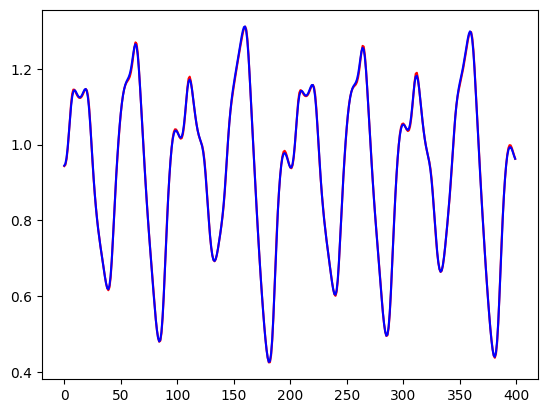

In [37]:
# visualize
last = 400
plt.plot(range(last), output.view(-1).detach().numpy()[-last:], 'r')
plt.plot(range(last), y_test.view(-1).detach().numpy()[-last:], 'b')
plt.show()

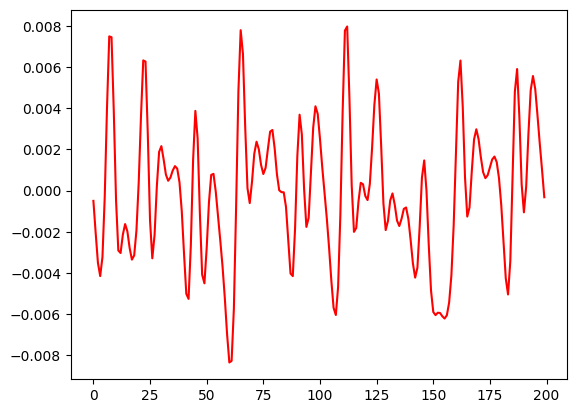

In [38]:
# visualize difference 
last = 200
plt.plot(range(last), (output.view(-1).detach().numpy()[-last:] - y_test.view(-1).detach().numpy()[-last:]), 'r')
plt.show()

Dataset SunSpot


In [39]:
sun = dl.loader_explicit(Sunspot, test_size=400, max_samples=1000)
Xs, Xs_test, ys, ys_test = sun() 

In [40]:
esn.fit(Xs, ys)

output_sun = esn(Xs_test)

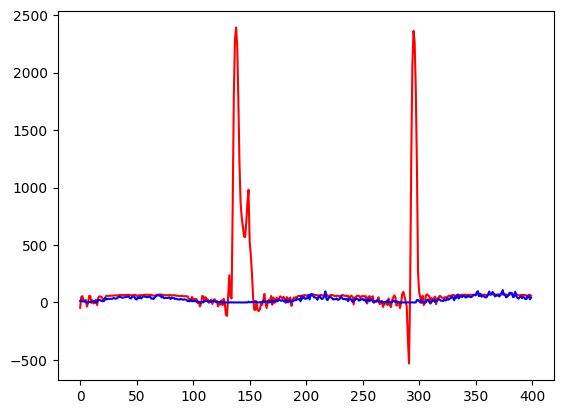

In [41]:
last = 400
plt.plot(range(last), output_sun.view(-1).detach().numpy()[-last:], 'r', label="predicted")
plt.plot(range(last), ys_test.view(-1).detach().numpy()[-last:], 'b', label="ground_truth")
plt.show()

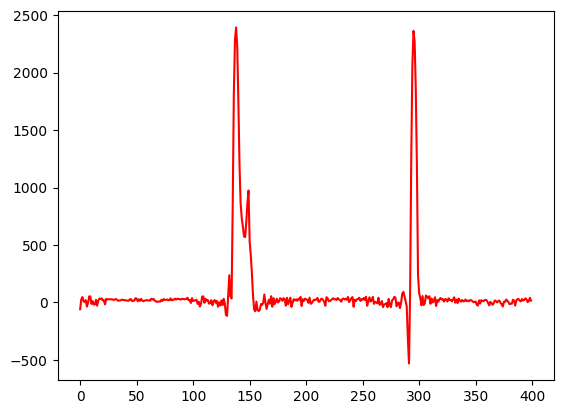

In [42]:
last = 400
plt.plot(range(last), output_sun.view(-1).detach().numpy()[-last:] - ys_test.view(-1).detach().numpy()[-last:], 'r')
plt.show()

Zbiór Sunspot jako badany przy wielu róznych parametrach.

In [60]:
sun = dl.loader_explicit(Sunspot, test_size=400, max_samples=1000)
Xs, Xs_test, ys, ys_test = sun() 

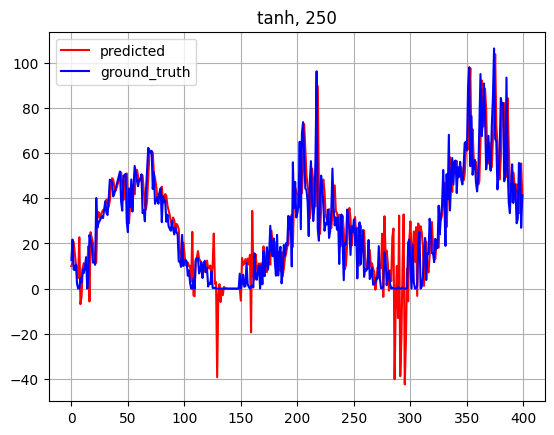

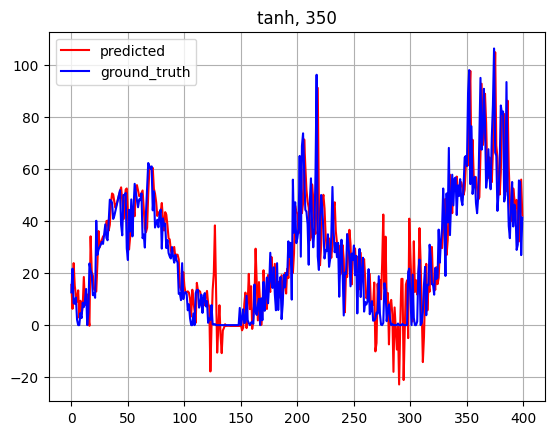

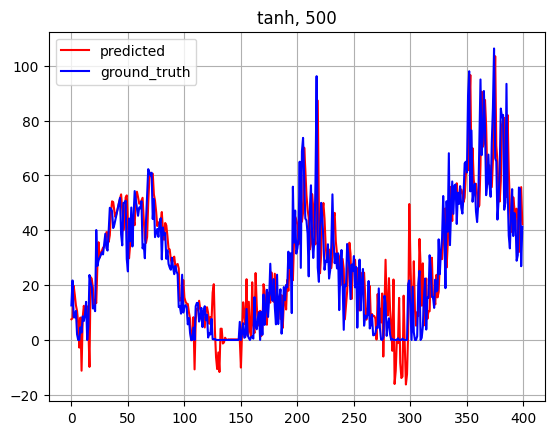

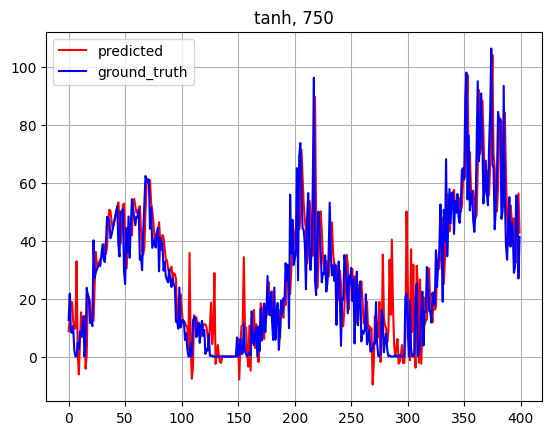

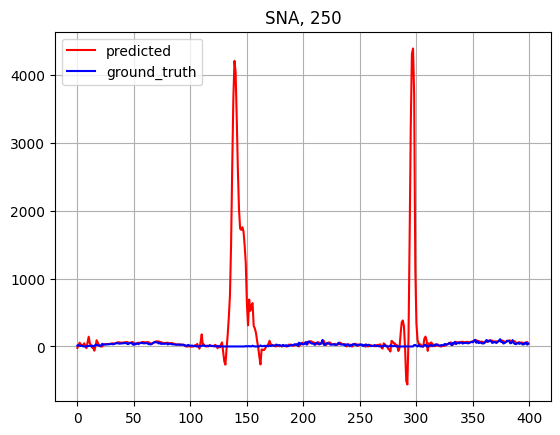

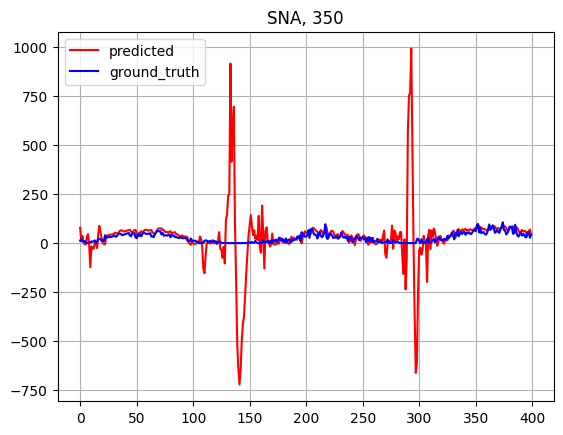

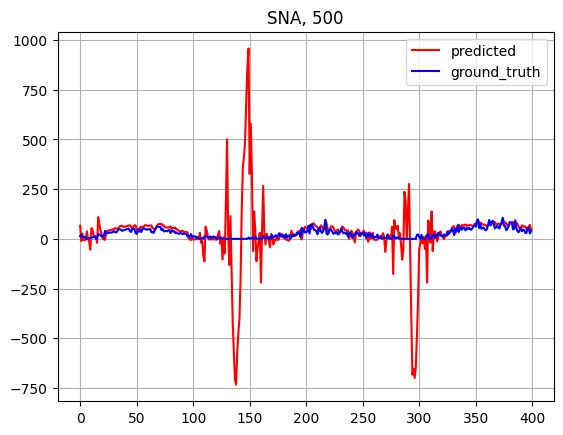

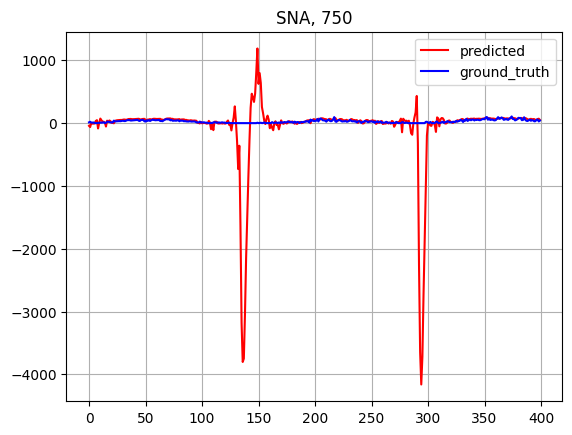

In [64]:
for activation_func, act_name in [(tanh(), "tanh") , (self_normalizing_default(), "SNA")]:
    for hidden in [250, 350, 500, 750]:
        gdesn = GroupedDeepESN(hidden_size=hidden, activation=activation_func)
        # gdesn = DeepESN(num_layers=1, hidden_size=hidden, activation=activation_func)
        gdesn.fit(Xs, ys)
        output_sun = gdesn(Xs_test)

        last = 400
        plt.title(act_name + ", " + str(hidden))
        plt.plot(range(last), output_sun.view(-1).detach().numpy()[-last:], 'r',label="predicted")
        plt.plot(range(last), ys_test.view(-1).detach().numpy()[-last:], 'b', label="ground_truth")
        plt.legend()
        plt.grid()
        plt.show()
        